# Ames, Iowa - Housing price predition
<a id='problem'></a>

# 1. Preprocessing the Data <a id='preprocessing'></a>

After we have defined the problem statement and know how to evaluate our model performance, we need to preprocess the data before the modelling stage.

There are often mistakes or issues with our data that we need to address before we can actually fit our model using them. 

Common things to look out for in our data:
* Typos
* Outliers
* Missing Values
* Incorrect Data Types


### Importing Libraries (expand to view)

In [1]:
# Standard Tools
from scipy import stats
import pandas as pd
import numpy as np
import pickle
import os

# Visualisation Tools
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling Tools
from sklearn.model_selection import train_test_split, \
cross_val_score, cross_validate, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, \
GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, \
Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels as sm

# Misc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

# Setting the random state
np.random.seed(8888)
SEED = 8888


###  Loading the Data and Initial Analysis <a id='initial_analysis'></a>

Firstly, we import our data and get an overall feel of what it contains.

We usually want to take a quick scan at the first few rows of our data and look our for any potential mistakes mentioned previously.

Furthermore, i highly recommend looking through any __README__ or __DESCRIPTION__ files that come with the dataset. Often, they provide information on how categorical variables were encoded and may also provide explaination for encoding observations as missing.

In [2]:
# Loading our data
df = pd.read_csv('train.csv')

print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 1460 rows and 81 columns.


In [3]:
# Getting a feel for how our data looks like
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Dropping column Id as we will use the dataframe indexing
df = df.drop('Id', axis=1)

Next, we can scan the data types of our variables and check back with our data and see if they are correct. 

Determining whether they are correct or not may require some domain knowledge but most of the time can be identified with a bit of common sense. (: 

i.e Prices are numerical but they are classified as 'object', which is definitely a mistake.

Note: Expand the cell below to view the data types.

In [5]:
# Quick scan for missing values and wrong datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

From our initial analysis, we observe that we have variables with missing data and some with potentially wrong datatypes (ordinal variables). We will address these issues below.

In [6]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

###  Handling Missing Data <a id='missing_data'></a>

__Missing data__ is common in most data sets. While there are algorithms that can handle missing data (i.e. xgboost), not all of them can.

As we will be comparing different models, it is good practice to handle these missing values.

There are 2 options when dealing with missing data:
1. __Imputation__
2. __Dropping Column / Observations__

For imputation, the method varies depending on the type of variable:
* __Numerical__ - Imputation with Mean / Median / K-Nearest Neighbours
* __Categorical__ - Imputation with Mode / K-Nearest Neighbours 

Note: For __*time series*__ data, we can impute numerical variables using __Linear Interpolation / Back-filling / Forward-filling__.

With regards to dropping variables, i do not know of any 'rules' but the __rules of thumb__ that i usually employ are:
* Drop variables with more than 50% missing data
* If fraction of missing values is negligible/small compared to number of observations, drop rows that are missing data.



In [7]:
print("JJJJ")

JJJJ


In [8]:
df.isnull()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          False     False        False    False   False   True     False   
1          False     False        False    False   False   True     False   
2          False     False        False    False   False   True     False   
3          False     False        False    False   False   True     False   
4          False     False        False    False   False   True     False   
...          ...       ...          ...      ...     ...    ...       ...   
1455       False     False        False    False   False   True     False   
1456       False     False        False    False   False   True     False   
1457       False     False        False    False   False   True     False   
1458       False     False        False    False   False   True     False   
1459       False     False        False    False   False   True     False   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0           False      False      False      False         False       False   
1           False      False      False      False         False       False   
2           False      False      False      False         False       False   
3           False      False      False      False         False       False   
4           False      False      False      False         False       False   
...           ...        ...        ...        ...           ...         ...   
1455        False      False      False      False         False       False   
1456        False      False      False      False         False       False   
1457        False      False      False      False         False       False   
1458        False      False      False      False         False       False   
1459        False      False      False      False         False       False   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          False     False       False        False        False      False   
1          False     False       False        False        False      False   
2          False     False       False        False        False      False   
3          False     False       False        False        False      False   
4          False     False       False        False        False      False   
...          ...       ...         ...          ...          ...        ...   
1455       False     False       False        False        False      False   
1456       False     False       False        False        False      False   
1457       False     False       False        False        False      False   
1458       False     False       False        False        False      False   
1459       False     False       False        False        False      False   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            False      False     False        False        False       False   
1            False      False     False        False        False       False   
2            False      False     False        False        False       False   
3            False      False     False        False        False       False   
4            False      False     False        False        False       False   
...            ...        ...       ...          ...          ...         ...   
1455         False      False     False        False        False       False   
1456         False      False     False        False        False       False   
1457         False      False     False        False        False       False   
1458         False      False     False        False        False       False   
1459         False      False     False        False        False       False   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          False      False      False       False     False     False   
1          False      False      False       False

In [9]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [10]:
df.isnull().mean().sort_values(ascending=False) * 100   #sorting according to high null values to lower

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
Condition1        0.000000
Neighborhood      0.000000
LandSlope         0.000000
L

In [11]:
# Helper function to help check for missing data
def variable_missing_percentage(df, save_results=False):
    '''
    Function that shows variables that have missing values and the percentage of total observations that are missing.
    
    Arguments:
        df : Pandas DataFrame
        save_results : bool, default is False
            Set as True to save the Series with the missing percentages.
    
    Returns:
        percentage_missing : Pandas Series
            Series with variables and their respective missing percentages.
    '''
    percentage_missing = df.isnull().mean().sort_values(ascending=False) * 100
    percentage_missing = percentage_missing.loc[percentage_missing > 0].round(2)
    missing_variables = len(percentage_missing)
    
    if len(percentage_missing) > 0:
        print(f'There are a total of {missing_variables} variables with missing values. Percentage of total missing:')
        print()
        print(percentage_missing)
    
    else:
        print('The dataframe has no missing values in any column.')
    
    if save_results:
        return percentage_missing

In [12]:
variable_missing_percentage(df)

There are a total of 19 variables with missing values. Percentage of total missing:

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


After looking into the description.txt file, we find that the cause of most of the missing variables are due to the property not having the associated feature. Therefore, we will be dropping the variables that have high percentage of missing data ( > 50%) as they would not generalise well to new data.

In [13]:
df.shape

(1460, 80)

In [14]:
def drop_missing_variables(df, threshold, verbose=True):
    '''Function that removes variables that have missing percentages above a threshold.
    
    Arguments:
        df : Pandas DataFrame
        threshold : float
            Threshold missing percentage value in decimals.
        verbose : bool, default is True
            Prints the variables that were removed.
            
    Returns:
        df : Pandas DataFrame with variables removed
    '''
    shape_prior = df.shape
    vars_to_remove = df.columns[df.isnull().mean() > threshold].to_list()
    df = df.drop(vars_to_remove, axis=1)
    shape_post = df.shape
    
    print(f'The original DataFrame had {shape_prior[1]} variables.')
    print(f'The returned DataFrame has {shape_post[1]} variables.')
    
    if verbose:
        print()
        print('The following variables were removed:')
        print(vars_to_remove)
        
    return df

In [15]:
df = drop_missing_variables(df, 0.5)

The original DataFrame had 80 variables.
The returned DataFrame has 76 variables.

The following variables were removed:
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [16]:
df.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [17]:
df.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [18]:
# Dropping features that are related to the ones we just removed
df = df.drop(['MiscVal', 'PoolArea'], axis=1)

For the following categorical variables, we will be replacing the missing values as a new category that indicates the property does not have that feature.

In [19]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [20]:
"""
1 Bsmt
2 check its dtype === object
push them in a list 
"""
df.columns.sort_values(ascending=True)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice',
       'SaleType'

In [21]:
#Handling missing values where <50%

In [22]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [23]:
df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

##### df.BsmtFinSF1.value_counts()

In [25]:
df.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [26]:
df.GarageArea.value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

In [27]:
df.FireplaceQu = df.FireplaceQu.fillna('NoFirePlace')

basement_variables = ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
df[basement_variables] = df[basement_variables].fillna('NoBasement')

garage_variables = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_variables] = df[garage_variables].fillna('NoGarage')

In [28]:
# Checking which variables are still missing
variable_missing_percentage(df)

There are a total of 5 variables with missing values. Percentage of total missing:

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64


We hypothesize that the Garage Year Built variable is highly correlated to the variable Year House Built.

In [29]:
df.YearBuilt.corr(df.GarageYrBlt).round(2)

0.83

As expected, the two variables are highly correlated and we will be dropping the variable 'GarageYrBlt' as most of its information is captured in the variable 'YearBuilt'.

In [30]:
df = df.drop('GarageYrBlt', axis=1)

For the variables that have low missing percentages (<1%), we will just drop the missing observations.

In [31]:
df = df.dropna(how='any', subset=['MasVnrType', 'MasVnrArea', 'Electrical'])

For the variable 'LotFrontage', we chose to use a K-Nearest Neighbours imputation of the missing value. The rationale is that houses come in different sizes which would definitely influence the Lot Frontage of the property. Therefore, we believe that similar sized houses would have similar Lot Frontage, therefore, being a better imputation than just taking the median.

In [32]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
        ... 
160.0      1
112.0      1
152.0      1
149.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [33]:
# Installing missingpy package, remember to turn internet on in the settings! 
!pip install missingpy

from missingpy import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='distance', metric='masked_euclidean')

df.LotFrontage = knn_imputer.fit_transform(np.array(df.LotFrontage).reshape(-1,1))

In [34]:
# Making sure we have tackled all missing variables
variable_missing_percentage(df)

The dataframe has no missing values in any column.


Now that we have sucessfully dealt with the missing values, we need to check that they have correct data types.

###  Correcting Data Types <a id='data_types'></a>

In our initial analysis, we noted some variables being stored as numerical when they should be categorical, as well as some categorical variables that can be stored as ordinal variables due to the inate hierarchy in the variable. Therefore, this section seeks to address these problems.

In [35]:
df.MSSubClass.dtype

dtype('int64')

In [36]:
df.MSSubClass.value_counts()

20     532
60     296
50     144
120     86
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [37]:
# Changing numeric variables to categorical
df = df.replace({
    'MSSubClass' : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60",
                    70 : "SC70", 75 : "SC75", 80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                    150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
    'MoSold' : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
})

In [38]:
# Converting categorical variables to an interval scale as they are ordinal in nature.
df = df.replace({
    'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtQual' : {'NoBasement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtCond' : {'NoBasement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtExposure' : {'NoBasement' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4},
    'BsmtFinType1' : {'NoBasement' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'BsmtFinType2' : {'NoBasement' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'FireplaceQu' : {'NoFirePlace' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageFinish' : {'NoGarage' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
    'GarageQual' : {'NoGarage' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageCond' : {'NoGarage' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
})

# Creating a list of our ordinal variables
ordinal_vars = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond'
]

In [39]:
# Checking our datatypes once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass       1451 non-null object
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 n

In [40]:
df.BsmtCond.value_counts()

3    1303
4      64
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [41]:
# Changing features to their correct data types
df.BsmtCond = df.BsmtCond.astype('int64')
df.BsmtFinType2 = df.BsmtFinType2.astype('int64')
df.FireplaceQu = df.FireplaceQu.astype('int64')

Now that we are done with preprocessing our data, we can move on to exploratory data analysis of our data!

#  Exploratory Data Analysis <a id='eda'></a>

In this section, we will be taking a closer look at our data and using visualisations to better understand our data. As the type of analysis differs for numerical and categorical data, we will analyse them separately in their own sections.

For numerical variables, __univariate analysis__ will consist of checking the __variable's distribution__ (focusing on skewness) and performing __transformations__ if necessary. We will then analyse how each variable relates to our target variable, SalesPrice. 

For __categorical variables__, we will look into the __variable's distribution across different categories__, before seeing the effect that each category has on our target variable. 

*Note: I have previously defined some helper functions that i use across various projects and have collapsed the code for cleaner presentation. Feel free to expand them for more clarity on what they are doing.* 

In [42]:
def change_variables_to_categorical(df, vars_to_change=[]):
    '''Function that changes all non-numeric variables to categorical datatype.
    
    Arguments:
        df : Pandas DataFrame
        vars_to_change : list, default is an empty list
            If a non-empty list is passed, only the variables in the list are converted to 
            categorical datatype.
    
    Returns:
        df : Pandas DataFrame with categorical datatypes converted.
    '''
    categorical_variables = df.select_dtypes(exclude='number').columns.to_list()
    
    if len(vars_to_change) > 0:
        categorical_variables = vars_to_change
    
    for var in categorical_variables:
        df[var] = df[var].astype('category')
        
    return df

In [43]:
# Changing datatypes from 'objects' to 'category' --> More memory efficient
df = change_variables_to_categorical(df)

In [44]:
def numerical_categorical_split(df):
    '''Function that creates a list for numerical and categorical variables respectively.
    '''
    numerical_var_list = df.select_dtypes(include='number').columns.to_list()
    categorical_var_list = df.select_dtypes(exclude='number').columns.to_list()
    
    return numerical_var_list, categorical_var_list

In [45]:
# Creating lists of numerical and categorical features
numerical_vars, categorical_vars = numerical_categorical_split(df)

# Splitting 2 dataframes, one for numeric variables and another for categorical
numerical_df = df[numerical_vars]
categorical_df = df[categorical_vars]

In [46]:
# Checking if both have same number of observations
print(numerical_df.shape, categorical_df.shape)

(1451, 45) (1451, 28)


### 3.1 Target Variable : SalePrice <a id='target'></a>

First, we look at the distribution of the target variable and check for any negative values.

In [47]:
any(numerical_df.SalePrice <= 0)

False

Next, let's check the distribution and skewness of the target.

Skewness of SalePrice : 1.88


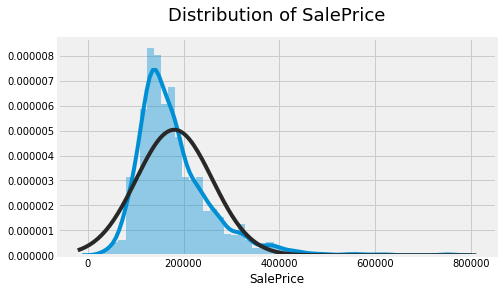

In [48]:
print(f'Skewness of SalePrice : {round(stats.skew(df.SalePrice),2)}')

fig = plt.figure(figsize=(7,4))
ax = sns.distplot(numerical_df.SalePrice, fit=stats.norm)
ax.set_title('Distribution of SalePrice', size=18, y=1.05)
plt.show();

It appears that we have a bit of positive skew, we will try taking the logarithmic transformation to see if it alleviates this issue.

Skewness of LogSalePrice : 0.12


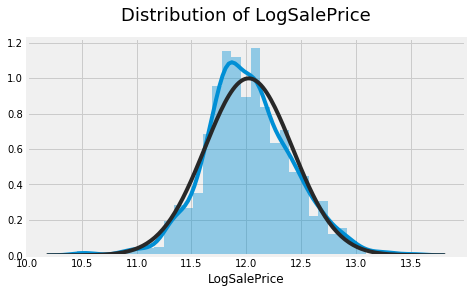

In [49]:
numerical_df['LogSalePrice'] = np.log(numerical_df.SalePrice)

print(f'Skewness of LogSalePrice : {round(stats.skew(numerical_df.LogSalePrice),2)}')

fig = plt.figure(figsize=(7,4))
ax = sns.distplot(numerical_df.LogSalePrice, fit=stats.norm)
ax.set_title('Distribution of LogSalePrice', size=18, y=1.05)
plt.show();

The distribution of LogSalePrice is much more normally distributed, therefore, we will be using the log-transform as our new target variable. 

For our bivariate analysis in later sections, we will be comparing the independent variables against the LogSalePrice.

Note: For submission later, we need to take the __exponent of our predicted results__ to get the predicted SalePrice.

Note: [Effect of transforming the targets in regression model.][1]

[1]: https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py

In [50]:
numerical_df = numerical_df.drop('SalePrice', axis=1)

###  Numerical Variables - Univariate Analysis <a id='num_var_univariate'></a>

Typically if the number of variables are small, i like to plot the individual distributions of the variables to get a better understanding of our data.

However, in reality, the number of features within datasets are often too numerous and it takes too much time to look at each variable individually.

Therefore, in these situations, it is more efficient to analyse the variables that are likely to cause problems in our modelling later on. One of the main problems is the variables having large positive or negative skew.

Usually, variables are considered skewed if they have skew of magnitude > 0.5, and highly skewed when the magnitude > 1. 

Hence, in this section, we will first identify which variables are very skewed and use visualisations to guide us on what approaches to handle these issues.

Reference : [Rule of thumb for identifying skewed variables.][1]

[1]: https://stats.stackexchange.com/questions/245835/range-of-values-of-skewness-and-kurtosis-for-normal-distribution

In [51]:
def check_variable_skew(df, threshold=1, verbose=True):
    '''Function that checks each variable in the dataframe for their skewness.
    
    Arguments:
        df : Pandas DataFrame
        threshold : int, default = 1
            The threshold that we allow for skewness within the variable.
        verbose : bool, default = True
            Prints out highly skewed variables and their values.
        
    Returns:
        highly_skewed_vars_list : list
    '''
    skewness = df.apply(lambda x : np.abs(stats.skew(x)))
    skewed_vars = skewness.loc[skewness >= threshold].sort_values(ascending=False).round(2)
    
    if len(skewed_vars) == 0:
        print('There are no variables that are highly skewed.')
        return []
    
    skewed_vars_list = skewed_vars.index.to_list()
    
    print(f'The following {len(skewed_vars_list)} variables are highly skewed:')
    print()
    for var in skewed_vars_list:
        print(var, '\t', skewed_vars.loc[var])
      
    return skewed_vars_list

In [52]:
def skewness_subplots(df, skewed_vars_list, n_cols=4, fig_size=(18,12)):
    '''Function that plots the distribution of each variable within a grid.
    
    Arguments:
        df : Pandas DataFrame
        skewed_vars_list : list
            List of variables to plot histograms for.
        n_cols : int, default = 4
            Number of columns for the grid
    '''
    num_vars = len(skewed_vars_list)
    n_rows = int(np.ceil(num_vars / n_cols))
    df_skewed_vars = df[skewed_vars_list]
    
    fig = plt.figure(figsize=fig_size)
    plt.suptitle('Distributions for Highly Skewed Variables', y=1.03, size=18)

    for i, col in enumerate(skewed_vars_list):
        skew = np.round(stats.skew(df[col]), 2)
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.distplot(df[col], ax=ax, kde=False, bins=50)
        ax.set_title(f'Skew : {skew}', size=16)
    
    plt.tight_layout()    
    plt.show();

In [53]:
# Creating a list of variables that are highly skewed
highly_skewed_vars = check_variable_skew(numerical_df)

The following 23 variables are highly skewed:

LotArea 	 12.22
3SsnPorch 	 10.26
LowQualFinSF 	 8.97
KitchenAbvGr 	 4.51
BsmtFinSF2 	 4.24
ScreenPorch 	 4.1
BsmtHalfBath 	 4.08
BsmtCond 	 3.7
GarageCond 	 3.32
BsmtFinType2 	 3.28
GarageQual 	 3.21
EnclosedPorch 	 3.09
MasVnrArea 	 2.67
LotFrontage 	 2.39
OpenPorchSF 	 2.38
BsmtFinSF1 	 1.7
WoodDeckSF 	 1.54
TotalBsmtSF 	 1.53
ExterCond 	 1.39
GrLivArea 	 1.37
1stFlrSF 	 1.37
BsmtQual 	 1.28
BsmtExposure 	 1.1


Since we have some variables that are highly skewed, we would like to visualise them to better understand how to handle them. The figure below is a grid of the distributions of these variables.

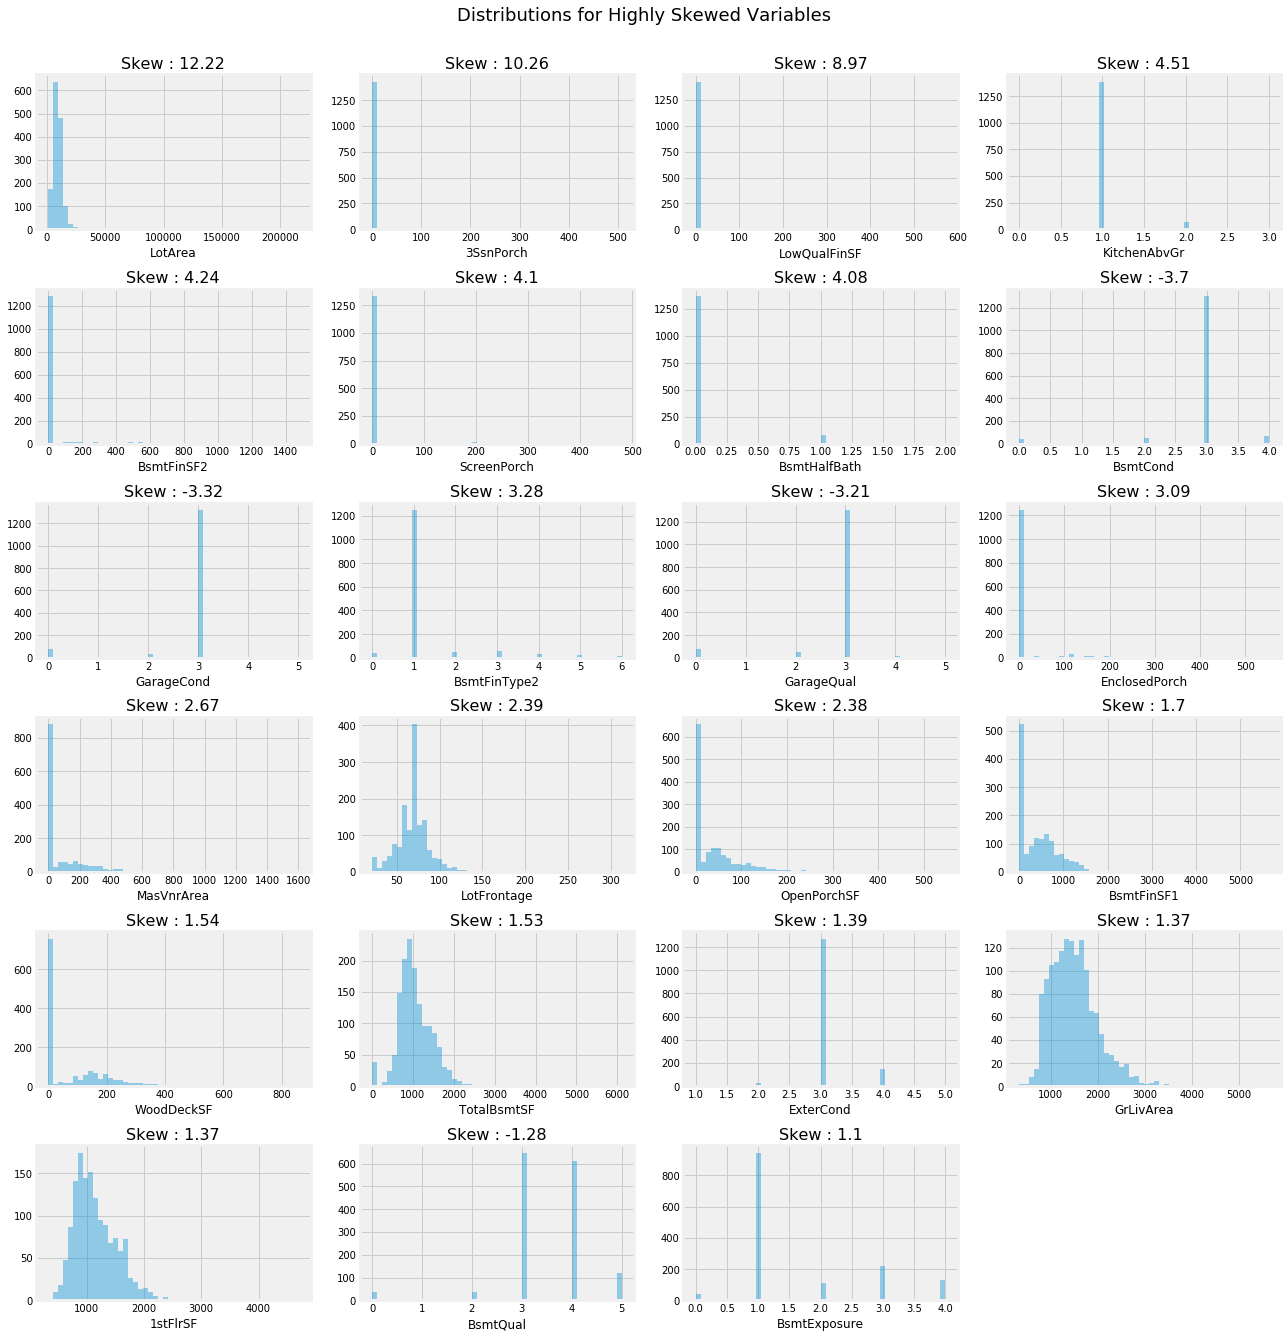

In [54]:
skewness_subplots(numerical_df, highly_skewed_vars, fig_size=(18,18))

From the figure, we observe that there are some variables such as '3SsnPorch' and 'LowQualFinSF' that have very __narrow distributions__ (most of its values are concentrated with very few/one values). 

An option is to binary encode these variables into a categorical variable of having the most common value versus other values. However, as these variables have values that are mostly concentrated in one value, there is not much variation and hence not much information within the variable. Therefore, we will be dropping such variables with more than 80% of their values being concentrated in a single value. 

As some of the variables are postively skewed with no negative values, therefore, we will apply a logarithmic transformation and check if it helps alleviate the skewness.

For the other oridinal variables that are skewed we will just leave them as is. 

In [55]:
def most_frequent_value_proportion(df, threshold=0.8, verbose=True):
    '''Function that returns series with variables and their most frequent values respectively.
    
    Arguments:
        df : Pandas DataFrame
        threshold : float
            Threshold for the maximum allowed proportion of a single value/class. 
            
    Returns:
        most_frequent_series : Pandas Series
            Variables as index and values as proportions for their most common value.
    '''
    most_frequent_pct = []
    for col in df.columns:
        most_frequent = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        most_frequent_pct.append(np.round(most_frequent,2))
    
    most_frequent_series = pd.Series(most_frequent_pct, index=df.columns)
    most_frequent_series = most_frequent_series.loc[most_frequent_series >= threshold]
    most_frequent_series = most_frequent_series.sort_values(ascending=False)
    
    if verbose:
        print(f'The following {len(most_frequent_series)} variables have a high concentration (>{threshold*100}%) of their values in one value only.')
        print()
        print(most_frequent_series)
    
    return most_frequent_series

In [56]:
narrow_dist_vars = most_frequent_value_proportion(numerical_df, threshold=0.8)

The following 12 variables have a high concentration (>80.0%) of their values in one value only.

3SsnPorch        0.98
LowQualFinSF     0.98
KitchenAbvGr     0.95
BsmtHalfBath     0.94
ScreenPorch      0.92
GarageCond       0.91
GarageQual       0.90
BsmtCond         0.90
BsmtFinSF2       0.88
ExterCond        0.88
EnclosedPorch    0.86
BsmtFinType2     0.86
dtype: float64


In [57]:
numerical_df['3SsnPorch'].value_counts()

0      1427
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [58]:
# Dropping narrowly distributed variables
numerical_df = numerical_df.drop(narrow_dist_vars.index.to_list(), axis=1)

In [59]:
# List of positvely skewed variables
pos_skewed_vars = list(set(highly_skewed_vars) - set(narrow_dist_vars.index.to_list()) - set(ordinal_vars))

In [60]:
pos_skewed_vars

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 '1stFlrSF',
 'WoodDeckSF',
 'MasVnrArea',
 'LotArea',
 'OpenPorchSF']

In [61]:
def make_log_variables(df, variables_list, drop=False):
    '''Function to make new columns of the logarithmic transformation of a list of variables.
    Arguments:
        df : Pandas DataFrame
        variables_list : list
            List of variables to log-transform.
        drop : bool, default = False
            Pass as true to drop the original variables.
    Returns:
        df : Pandas DataFrame with new variables.
        log_var_list : list
            List of the log-transformed variable names.
    '''
    # Checking for negative values for each variable
    any_neg_value = np.sum((df[variables_list] < 0).all(axis=0))
    if any_neg_value:
        raise ValueError('There are one or more columns with negative values and cannot be log-transformed.')
    
    log_var_list = []
    
    for var in variables_list:
        log_var_name = 'Log' + var
        df[log_var_name] = np.log1p(df[var])
        log_var_list.append(log_var_name)
    
    if drop:
        df = df.drop(variables_list, axis=1)
    
    return df, log_var_list

In [62]:
# Creating log-transformations for our highly skewed variables and saving the new variables in a list
numerical_df, log_var_list = make_log_variables(numerical_df, pos_skewed_vars, drop=False)

In [63]:
log_var_list

['LogLotFrontage',
 'LogBsmtFinSF1',
 'LogTotalBsmtSF',
 'LogGrLivArea',
 'Log1stFlrSF',
 'LogWoodDeckSF',
 'LogMasVnrArea',
 'LogLotArea',
 'LogOpenPorchSF']

In [64]:
numerical_df.head().T

0            1             2            3  \
LotFrontage       65.000000    80.000000     68.000000    60.000000   
LotArea         8450.000000  9600.000000  11250.000000  9550.000000   
OverallQual        7.000000     6.000000      7.000000     7.000000   
OverallCond        5.000000     8.000000      5.000000     5.000000   
YearBuilt       2003.000000  1976.000000   2001.000000  1915.000000   
YearRemodAdd    2003.000000  1976.000000   2002.000000  1970.000000   
MasVnrArea       196.000000     0.000000    162.000000     0.000000   
ExterQual          4.000000     3.000000      4.000000     3.000000   
BsmtQual           4.000000     4.000000      4.000000     3.000000   
BsmtExposure       1.000000     4.000000      2.000000     1.000000   
BsmtFinType1       6.000000     5.000000      6.000000     5.000000   
BsmtFinSF1       706.000000   978.000000    486.000000   216.000000   
BsmtUnfSF        150.000000   284.000000    434.000000   540.000000   
TotalBsmtSF      856.000000  1262.000000    920.000000   756.000000   
HeatingQC          5.000000     5.000000      5.000000     4.000000   
1stFlrSF         856.000000  1262.000000    920.000000   961.000000   
2ndFlrSF         854.000000     0.000000    866.000000   756.000000   
GrLivArea       1710.000000  1262.000000   1786.000000  1717.000000   
BsmtFullBath       1.000000     0.000000      1.000000     1.000000   
FullBath           2.000000     2.000000      2.000000     1.000000   
HalfBath           1.000000     0.000000      1.000000     0.000000   
BedroomAbvGr       3.000000     3.000000      3.000000     3.000000   
KitchenQual        4.000000     3.000000      4.000000     4.000000   
TotRmsAbvGrd       8.000000     6.000000      6.000000     7.000000   
Fireplaces         0.000000     1.000000      1.000000     1.000000   
FireplaceQu        0.000000     3.000000      3.000000     4.000000   
GarageFinish       2.000000     2.000000      2.000000     1.000000   
GarageCars         2.000000     2.000000      2.000000     3.000000   
GarageArea       548.000000   460.000000    608.000000   642.000000   
WoodDeckSF         0.000000   298.000000      0.000000     0.000000   
OpenPorchSF       61.000000     0.000000     42.000000    35.000000   
YrSold          2008.000000  2007.000000   2008.000000  2006.000000   
LogSalePrice      12.247694    12.109011     12.317167    11.849398   
LogLotFrontage     4.189655     4.394449      4.234107     4.110874   
LogBsmtFinSF1      6.561031     6.886532      6.188264     5.379897   
LogTotalBsmtSF     6.753438     7.141245      6.825460     6.629363   
LogGrLivArea       7.444833     7.141245      7.488294     7.448916   
Log1stFlrSF        6.753438     7.141245      6.825460     6.869014   
LogWoodDeckSF      0.000000     5.700444      0.000000     0.000000   
LogMasVnrArea      5.283204     0.000000      5.093750     0.000000   
LogLotArea         9.042040     9.169623      9.328212     9.164401   
LogOpenPorchSF     4.127134     0.000000      3.761200     3.583519   

                           4  
LotFrontage        84.000000  
LotArea         14260.000000  
OverallQual         8.000000  
OverallCond         5.000000  
YearBuilt        2000.000000  
YearRemodAdd     2000.000000  
MasVnrArea        350.000000  
ExterQual           4.000000  
BsmtQual            4.000000  
BsmtExposure        3.000000  
BsmtFinType1        6.000000  
BsmtFinSF1        655.000000  
BsmtUnfSF         490.000000  
TotalBsmtSF      1145.000000  
HeatingQC           5.000000  
1stFlrSF         1145.000000  
2ndFlrSF         1053.000000  
GrLivArea        2198.000000  
BsmtFullBath        1.000000  
FullBath            2.000000  
HalfBath            1.000000  
BedroomAbvGr        4.000000  
KitchenQual         4.000000  
TotRmsAbvGrd        9.000000  
Fireplaces          1.000000  
FireplaceQu         3.000000  
GarageFinish        2.000000  
GarageCars          3.000000  
GarageArea        836.000000  
WoodDeckSF        192.000000  
OpenPorchSF

Now that we have created new features by log-transforming the positively skewed variable, let's see if there are any improvements. 

In [65]:
print(f'Prior to log-transformation, there were {len(pos_skewed_vars)} variables that were highly positively skewed.')

Prior to log-transformation, there were 9 variables that were highly positively skewed.


In [66]:
highly_skewed_vars = check_variable_skew(numerical_df[log_var_list])

The following 1 variables are highly skewed:

LogTotalBsmtSF 	 5.14


It looks like the log transformation has corrected the skews for all but one variable. Therefore, we will __keep the log transformed variables for the successful transformation and drop the original variables__.

For the variable TotalBsmtSF that is still positively skewed, we will take a closer look at both its original and transfromed distributions.

In [52]:
# Dropping original variables
pos_skewed_vars.remove('TotalBsmtSF')
numerical_df = numerical_df.drop(pos_skewed_vars, axis=1)

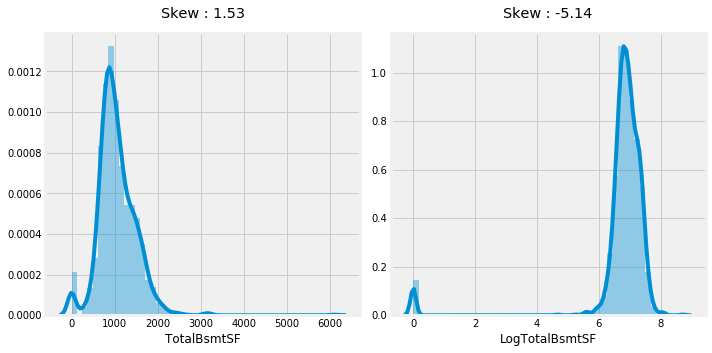

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.set_title(f'Skew : {stats.skew(numerical_df.TotalBsmtSF):.2f}', y=1.03)
sns.distplot(numerical_df.TotalBsmtSF, ax=ax1, bins=50)

ax2.set_title(f'Skew : {stats.skew(numerical_df.LogTotalBsmtSF):.2f}', y=1.03)
sns.distplot(numerical_df.LogTotalBsmtSF, ax=ax2, bins=50)

fig.tight_layout()
plt.show();

From the figure above, we observe that the actually the original distribution is less skewed than the log-transformed variable. The skew present in the original distribution is likely to be caused by outliers.

Using a scatteplot against the target variable, we can check for outliers.

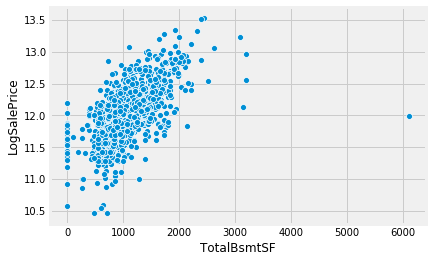

In [54]:
fig = sns.scatterplot(numerical_df.TotalBsmtSF, numerical_df.LogSalePrice)

The observation that is greater than 6000 is clearly an outlier, therefore we will drop the observation and check back on our variable's skew after.

In [67]:
# Removing the observation from both our numerical and caregorical data frames
outliers = numerical_df.loc[numerical_df.TotalBsmtSF > 5000].index.to_list()

In [68]:
outliers

[1298]

In [69]:
# Dropping the outlier from both numerical and categorical data frames
numerical_df = numerical_df.drop(outliers, axis=0)
categorical_df = categorical_df.drop(outliers, axis=0)
print(numerical_df.shape, categorical_df.shape)

(1450, 42) (1450, 28)


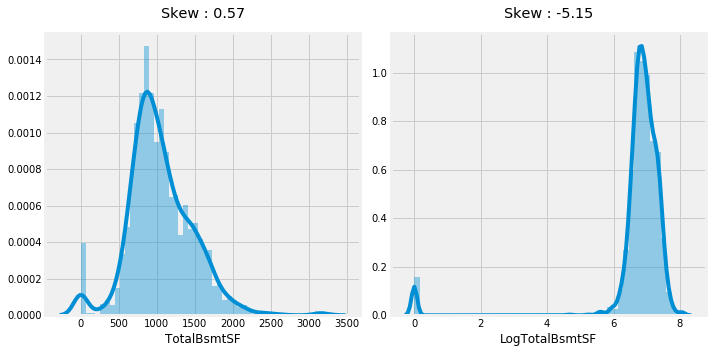

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.set_title(f'Skew : {stats.skew(numerical_df.TotalBsmtSF):.2f}', y=1.03)
sns.distplot(numerical_df.TotalBsmtSF, ax=ax1, bins=50)

ax2.set_title(f'Skew : {stats.skew(numerical_df.LogTotalBsmtSF):.2f}', y=1.03)
sns.distplot(numerical_df.LogTotalBsmtSF, ax=ax2, bins=50)

fig.tight_layout()
plt.show();

After removing the outlier, the original variable is much more normally distributed, therefore we will remove the log-transformed variable from out dataset. 

In [58]:
numerical_df = numerical_df.drop('LogTotalBsmtSF', axis=1)

Now that we have finished our univariate analysis and cleaning of our numerical data, we can proceed to bivariate analysis! 

###  Numeric Variables - Bivariate Analysis <a id='num_var_bivariate'></a>

For bivariate analysis, we are interested in the following:
1. Relationship between each independent variable and target (LogSalePrice)
2. Relationship between the independent variables - Checking for multicollinearity

We can obtain a quantitative understanding of the relationship by calculating the pearson's coefficient between the variables. 

We can visualise the relationships using scatterplots and a correlation heatmap.



In [59]:
numerical_df.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'YrSold',
       'LogSalePrice', 'LogOpenPorchSF', 'LogBsmtFinSF1', 'LogGrLivArea',
       'LogMasVnrArea', 'LogLotArea', 'LogLotFrontage', 'LogWoodDeckSF',
       'Log1stFlrSF'],
      dtype='object')

In [60]:
# Rearranging our dataframe for easier interpretation of heatmap
log_sale_price = numerical_df.LogSalePrice
numerical_df = numerical_df.drop('LogSalePrice', axis=1)
numerical_df['LogSalePrice'] = log_sale_price

In [61]:
numerical_df.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'YrSold',
       'LogOpenPorchSF', 'LogBsmtFinSF1', 'LogGrLivArea', 'LogMasVnrArea',
       'LogLotArea', 'LogLotFrontage', 'LogWoodDeckSF', 'Log1stFlrSF',
       'LogSalePrice'],
      dtype='object')

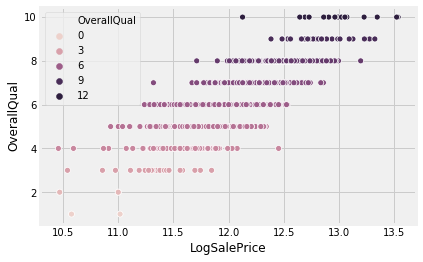

In [71]:
sns.scatterplot(numerical_df.LogSalePrice,y=numerical_df.OverallQual,hue=numerical_df.OverallQual)

In [75]:
numerical_df["LogSalePrice"].corr(df["OverallQual"])

0.8190755270582604

(33.0, 0.0)

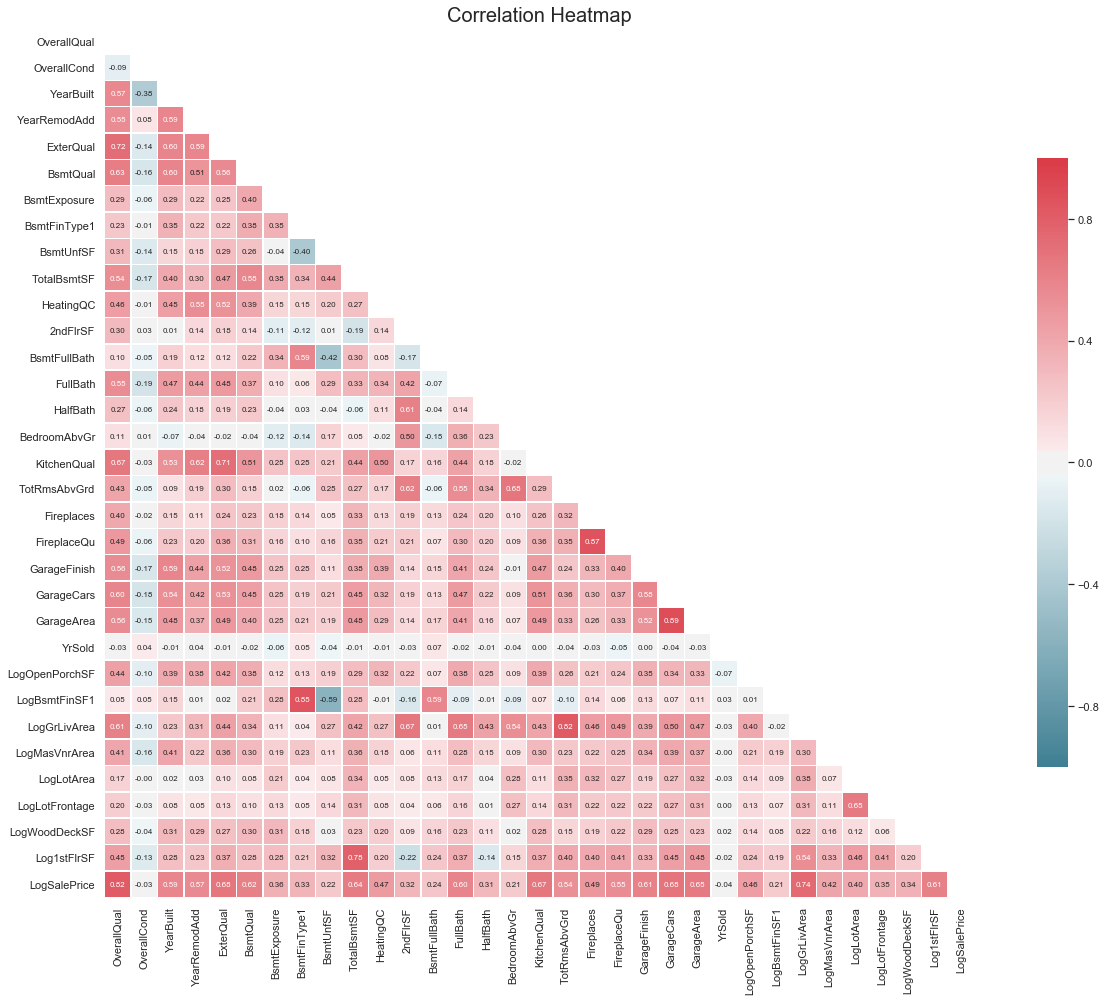

In [62]:
 sns.set(style="white")

# Compute the correlation matrix
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))
plt.title('Correlation Heatmap', size=20)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, fmt='.2f', vmin=-1, vmax=1.0, center=0, square=True,
                      linewidths=.5, cbar_kws={"shrink": .7}, annot=True, annot_kws={"size": 8})

bottom, top = ax.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

In [76]:
numerical_df["LogBsmtFinSF1"].corr(df["BsmtFinType1"])

0.8521757467988392

First, let's look at the __last row__ in the heatmap, which shows the __correlation between each individual variable and the target__. We observe that most variables are postively correlated to our target, with the overall quality ('OverallQual') and logarithmic transformation of the ground living area ('LogGrLivArea') being particularly strong predictors. This makes sense as larger houses are expected to cost more.

As the variables 'OverallCond' and 'YrSold' have almost no relationship with the target, we will drop these variables. 

However, there may potentially be __multicollinearity__ present in our data, with some pairs of independent variables having high correlation with each other. In terms of multicollinearity between independent variables, there is no hard cutoff to remove variables. But as a general rule of thumb, attention should be placed on variable pairs that have correlations around 0.8 or higher. Highly correlated variable pairs:
1. LogBsmtFinSF1 and BsmtFinType1 
2. 1stFlrSF and TotalBsmtSF
3. TotRmsAbrGrd and LogGrLivArea
4. FirePlaceQu and FirePlaces
5. GarageCars and GarageArea

We will drop GarageCars as it is clearly correlated with the size of the garage (GarageArea).

For the rest of the correlated variable pairs, we will just keep them in mind for now, and proceed with modelling with the variables included. Later on, we can use regularisation which helps deal with multicollinearity. 

In [77]:
numerical_df = numerical_df.drop(['OverallCond', 'YrSold', 'GarageCars'], axis=1)

In [64]:
corr_matrix_unstacked = corr.unstack().sort_values(ascending=False).drop_duplicates()
correlated_pairs = corr_matrix_unstacked.loc[corr_matrix_unstacked >= 0.75].index.to_list()
correlated_pairs

[('LogSalePrice', 'LogSalePrice'),
 ('GarageCars', 'GarageArea'),
 ('Fireplaces', 'FireplaceQu'),
 ('BsmtFinType1', 'LogBsmtFinSF1'),
 ('LogGrLivArea', 'TotRmsAbvGrd'),
 ('OverallQual', 'LogSalePrice'),
 ('TotalBsmtSF', 'Log1stFlrSF')]

The correlation heatmap has provided us a rough idea of the relationships between the variables. Now, we will plot the scatter plots of each variable against the target variable.

In [65]:
def scatter_subplots(df, target, hue=None, n_cols=4, fig_size=(12,12)):
    '''Function that plots the scatterplots of each variable against the target variable within a grid.
    
    Arguments:
        df : Pandas DataFrame with target variable included
        target : str
            Target feature name
        hue : str, default = None
            Column in the data frame that should be used for colour encoding
        n_cols : int, default = 4
            Number of columns for the grid
    '''
    independent_vars_list = list(df.columns)
    independent_vars_list.remove(target)
    num_vars = len(independent_vars_list)
    n_rows = int(np.ceil(num_vars / n_cols))
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=fig_size)
    plt.suptitle(f'Scatterplots of Independent Variables against {target}', y=1.02, size=18)

    for i, col in enumerate(independent_vars_list):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.scatterplot(x=col, y=target, hue=hue, data=df, ax=ax)
    
    plt.tight_layout()
    plt.show();

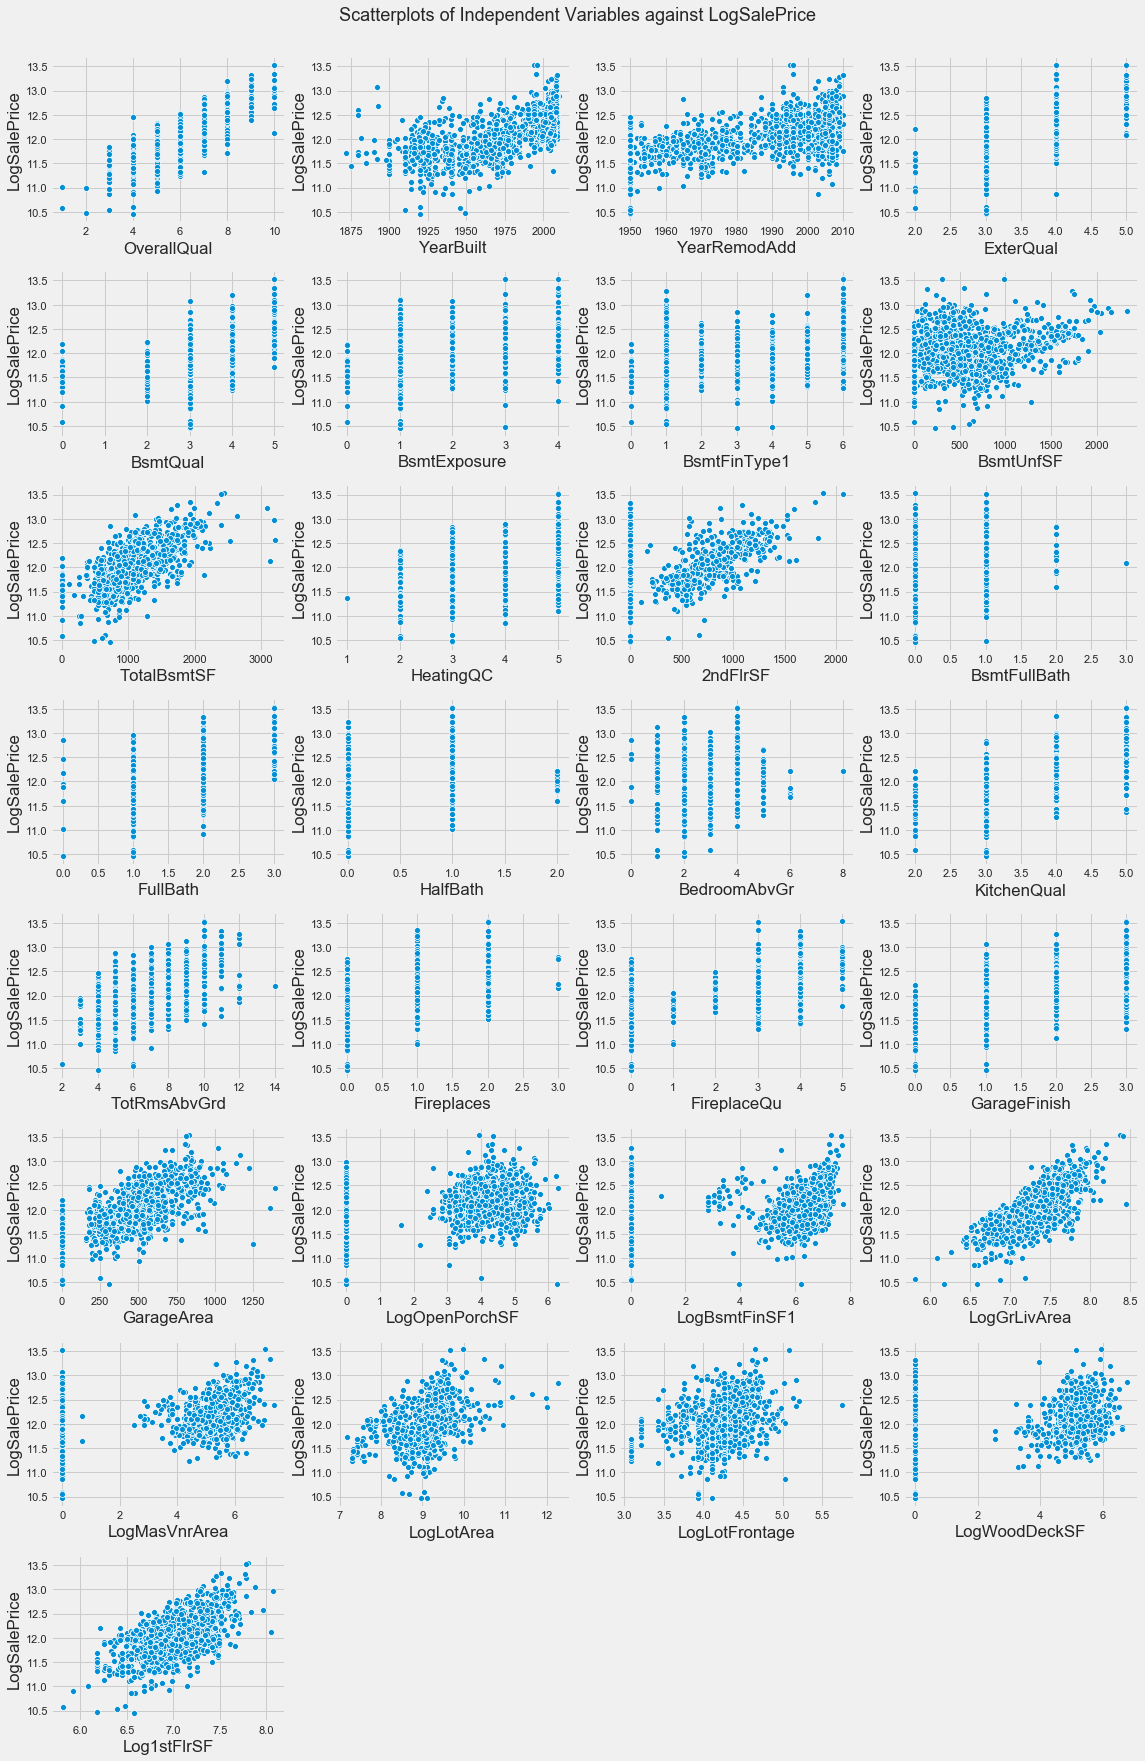

In [66]:
scatter_subplots(numerical_df, 'LogSalePrice', fig_size=(16,24))

From the scatterplots, it doesn't seem like we have any obvious outliers. Now that we have a good understanding of our numerical variables, we can move on to looking at our categorical variables.

### 3.3.1 Categorical Variables Analysis <a id='cat_var_univariate'></a>

Similar to numerical variables univariate analysis, we are interested in the distribution of categorical variables across their individual classes. We also do not want categorical variables that are majority concentrated within one class. 

In [67]:
# Adding the target variable to the categorical dataframe
categorical_df['LogSalePrice'] = numerical_df.LogSalePrice
print(categorical_df.shape, numerical_df.shape)

(1450, 29) (1450, 30)


In [68]:
def annotate_plot(ax, dec_places=1, annot_size=14):
    '''Function that annotates plots with their value labels.
    Arguments:
        ax : Plot Axis.
        dec_places : int
            Number of decimal places for annotations.
        annot_size : int
            Font size of annotations.
    '''
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.{}f'.format(dec_places)),
            (p.get_x() + p.get_width() / 2., p.get_height(),),
            ha='center', va='center',
            xytext=(0,10), textcoords='offset points', size=annot_size
        )

In [69]:
def var_categories_countplots(df, n_cols=3, orientation='v', x_rotation=45, y_rotation=0, palette='pastel', fig_size=(18,12)):
    '''Function that plots the class distribution for categorical variables.
    
    Arguments:
        df : Pandas DataFrame
        n_cols : int, default = 3
            Number of columns for the subplot grid.
        orientation : str, default = 'v'
            Plot orientation, with 'v' for vertical and 'h' for horizontal.
        x_rotation : int, default = 45
            Rotation of the x-axis labels.
        palette : str, default = 'pastel'
            Seaborn color palette for plotting.
    '''
    categorical_vars = df.select_dtypes(exclude='number').columns.to_list()
    num_vars = len(categorical_vars)
    n_rows = int(np.ceil(num_vars / n_cols))
    
    fig = plt.figure(figsize=fig_size)
    plt.suptitle('Class Distributions for Categorical Variables', y=1.01, size=24)
    
    for i, col in enumerate(categorical_vars):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.countplot(x=df[col], ax=ax, orient=orientation, palette=palette)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rotation)
        
        annotate_plot(ax, dec_places=0, annot_size=12) # Annotating plot with count labels
    
    plt.tight_layout()
    plt.show();

In [70]:
# Finding variables that have more than 80% of their values in one category
highly_imbalanced_vars = most_frequent_value_proportion(categorical_df, threshold=0.8, verbose=False)
highly_imbalanced_vars_list = highly_imbalanced_vars.index.to_list()
print(f'The following {len(highly_imbalanced_vars)} variables have more than 80% of their data concentrated in only one class:')
print()
print(highly_imbalanced_vars)

# Note: Function was defined earlier in univariate analysis of numerical variables

The following 15 variables have more than 80% of their data concentrated in only one class:

Utilities        1.00
Street           1.00
Condition2       0.99
Heating          0.98
RoofMatl         0.98
LandSlope        0.95
Functional       0.93
CentralAir       0.93
PavedDrive       0.92
Electrical       0.91
LandContour      0.90
SaleType         0.87
Condition1       0.86
BldgType         0.84
SaleCondition    0.82
dtype: float64


Let's visualise these variables and get a better understanding of their frequency distributions. Problematic variables would be those that have many categories but are sparsely distributed. For binary variables, the imbalanced class issue might not be as bad, as long as the imbalance is not too great. 

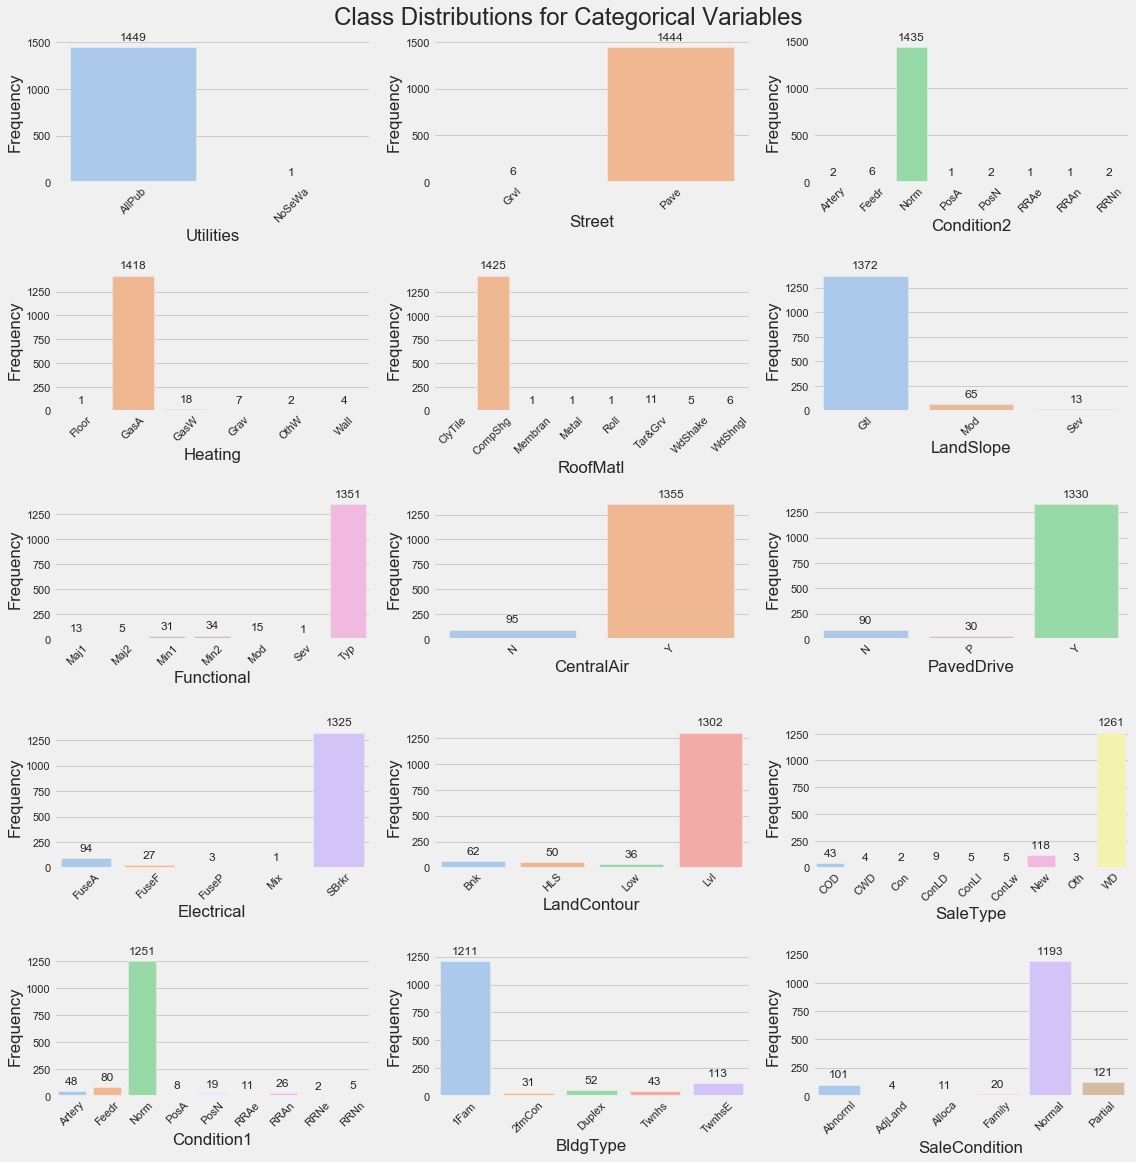

In [71]:
var_categories_countplots(categorical_df[highly_imbalanced_vars_list], fig_size=(16,16))

From the diagram above, we observe that the class imbalance within these variables are quite extreme, therefore, we will be dropping these variables from the analysis. This would help alleviate the problem of 'The Curse of Dimensionality' as we would have less dummy variables when we encode our data for modelling later on.

In [72]:
categorical_df = categorical_df.drop(highly_imbalanced_vars_list, axis=1)

Let's check the count distributions for the remaining categorical variables to check if there any more problematic variables.

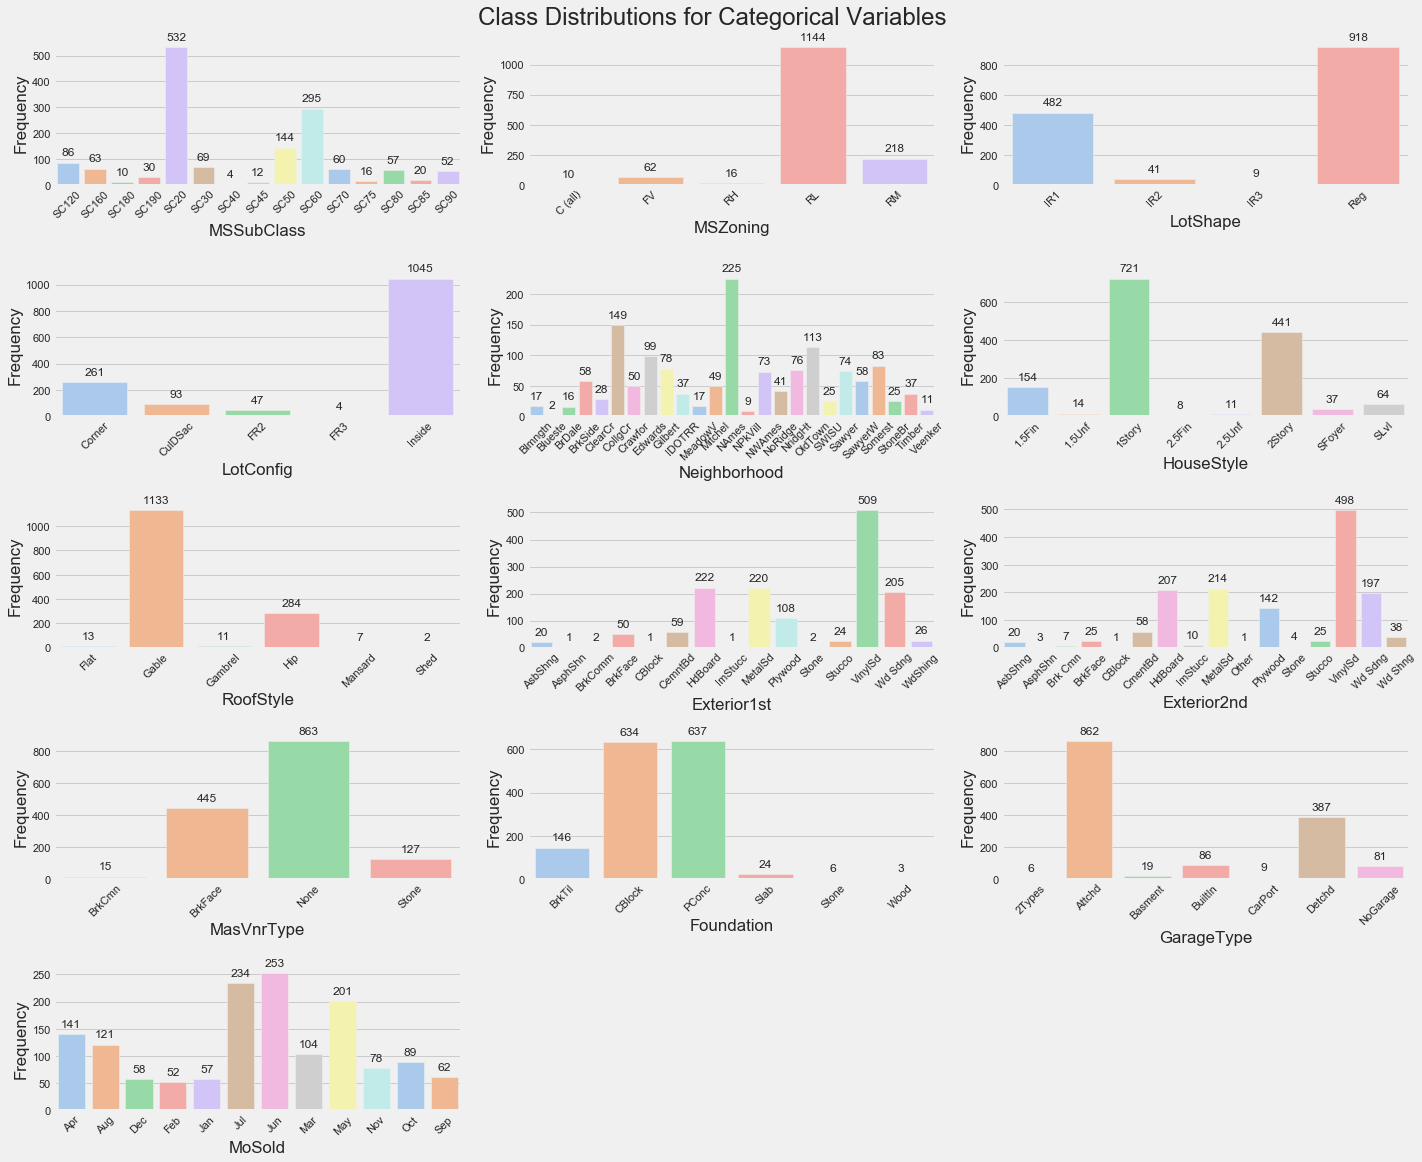

In [73]:
var_categories_countplots(categorical_df, fig_size=(20,16))

Looking at the variable distributions, we see that we still have some variables have classes that have very few observations. Therefore, we may want to lump similar classes together or under one category as 'Others'.

For variables that are not so obvious how to encode or if we are unsure how to encode them, we will just leave them as is.

In [74]:
categorical_df.MSZoning = categorical_df.MSZoning.apply(lambda x :
                                                        x if x == 'RL'
                                                        else x if x == 'RM'
                                                        else 'Others')

categorical_df.LotShape = categorical_df.LotShape.apply(lambda x :
                                                        x if x =='Reg'
                                                        else 'Irregular')

categorical_df.LotConfig = categorical_df.LotConfig.apply(lambda x :
                                                          x if x == 'Inside'
                                                          else x if x == 'CulDSac'
                                                          else x if x == 'Corner'
                                                          else 'FR')

categorical_df.RoofStyle = categorical_df.RoofStyle.apply(lambda x :
                                                          x if x =='Gable'
                                                          else x if x == 'Hip'
                                                          else 'Others')

categorical_df.MasVnrType = categorical_df.MasVnrType.apply(lambda x :
                                                            x if x == 'None'
                                                            else x if x == 'Stone'
                                                            else 'Brk')

categorical_df.Foundation = categorical_df.Foundation.apply(lambda x :
                                                            x if x =='BrkTil'
                                                            else x if x == 'CBlock'
                                                            else x if x == 'PConc'
                                                            else 'Others')

categorical_df.GarageType = categorical_df.GarageType.apply(lambda x : 
                                                            x if x == 'Attchd'
                                                            else x if x == 'BuiltIn'
                                                            else x if x == 'Detchd'
                                                            else x if x == 'NoGarage'
                                                            else 'Others')

### 3.3.2 Categorical Variables - Bivariate Analysis

Now that we have finished processing the categorical variables individually, we can explore the relationship between their individual levels and the target variable. 

In [75]:
def var_categories_boxplots(df, target, hue=None, n_cols=3, orientation='v', x_rotation=45, y_rotation=0, palette='pastel', fig_size=(18,12)):
    '''Function that plots the class distribution for categorical variables against target variable.
    
    Arguments:
        df : Pandas DataFrame
        target : str
            Target variable name.
        hue : str, default = None
            Column in the data frame that should be used for colour encoding.
        n_cols : int, default = 3
            Number of columns for the subplot grid.
        orientation : str, default = 'v'
            Plot orientation, with 'v' for vertical and 'h' for horizontal.
        x_rotation : int, default = 45
            Rotation of the x-axis labels.
        palette : str, default = 'pastel'
            Seaborn color palette for plotting.
    '''
    categorical_vars = df.select_dtypes(exclude='number').columns.to_list()
    num_vars = len(categorical_vars)
    n_rows = int(np.ceil(num_vars / n_cols))
    
    fig = plt.figure(figsize=fig_size)
    plt.suptitle('Categorical Variables vs Target', y=1.01, size=24)
    
    for i, col in enumerate(categorical_vars):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(x=df[col], y=df[target], ax=ax, hue=hue, orient=orientation, palette=palette)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=x_rotation)
    
    plt.tight_layout()
    plt.show();

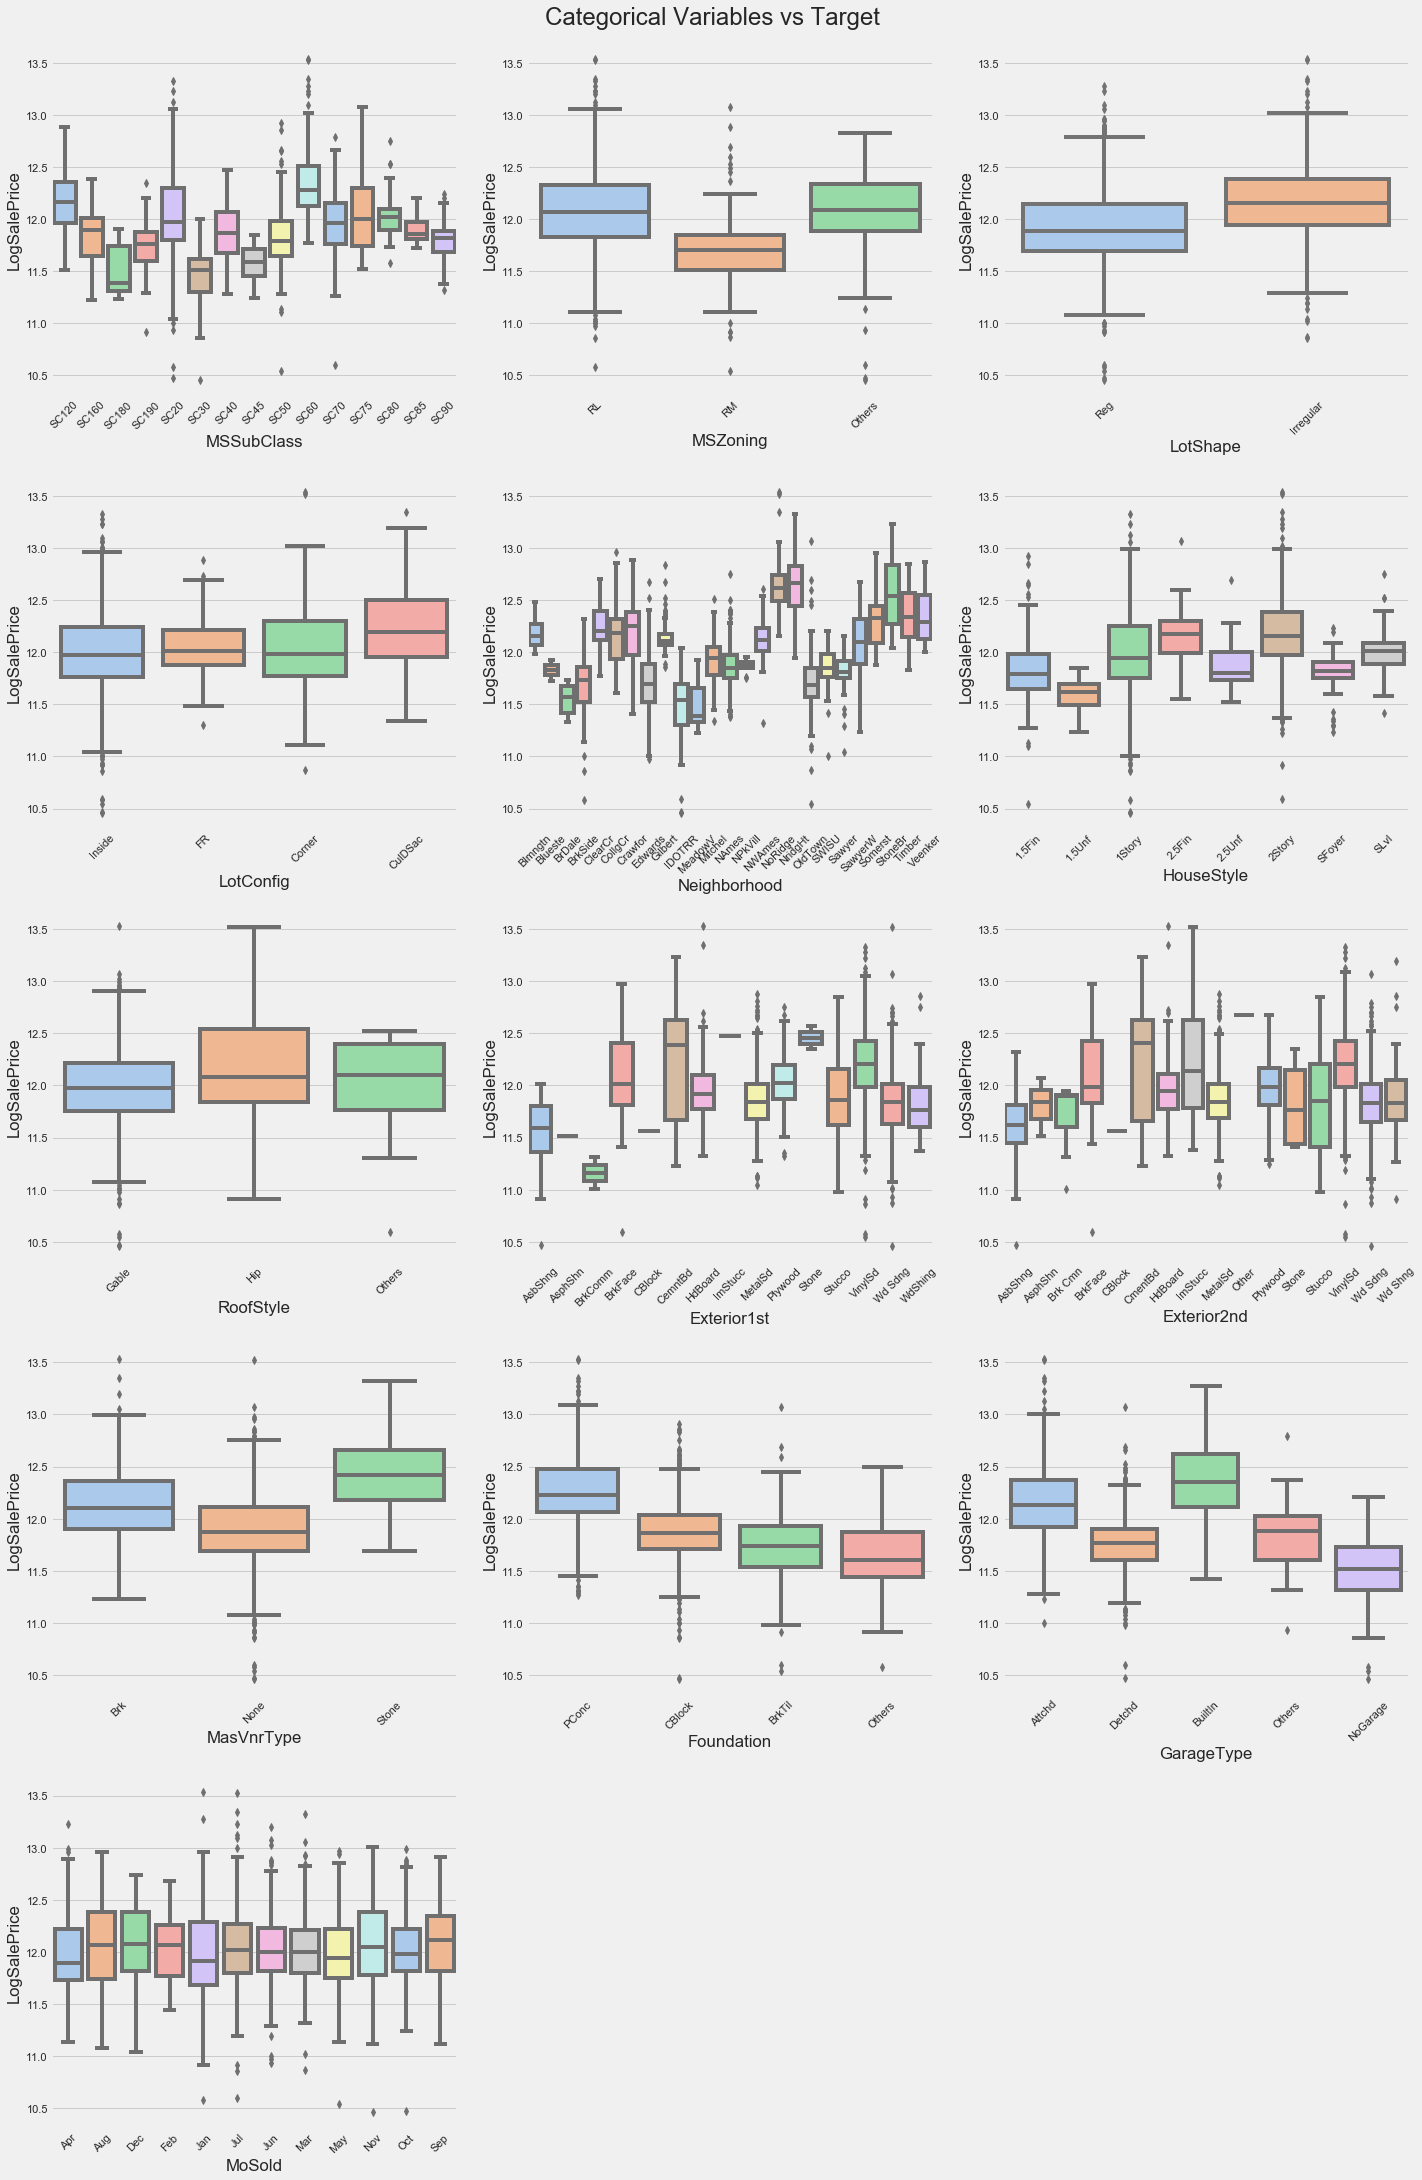

In [76]:
var_categories_boxplots(categorical_df, 'LogSalePrice', n_cols=3, fig_size=(20,30))